# Overview

In today's lecture we will discuss Runge-Kutta methods. These notes are
based largely on the book by Randall LeVeque entitled *Finite Difference
Methods for Ordinary and Partial Differential Equations* (SIAM,
Philadelphia, PA, 2007), Chapters 5-7.

Some complementary lectures are:

-   Chapter 8, K. Atkinson. Elementary Numerical Analysis. Wiley. 2003

-   Chapter 5, R. L. Burden, J. D. Faires. Numerical Analysis.
    Brooks/Cole. 2010

-   Chapter 16, Uri M. Ascher, Chen Greif. A First Course on Numerical
    Methods. SIAM. 2011

---



# Taylor series methods

The forward Euler method can be derived using a Taylor series expansion
of $u(t_{n+1})$ about $u(t_n)$,
$$
u(t_{n+1})= u(t_n) + ku'(t_n) + \frac{1}{2} k^2u''(t_n)+\dots
$$ 

If we
drop all terms of order $k^2$ and higher and use the differential
equation to replace $u'(t_n)$ with $f(u(t_n),t_n)$, we obtain
$$
u(t_{n+1})\approx u(t_n) + kf(u(t_n),t_n).
$$ 

The 1-step error is
$O(k^2)$ since we dropped terms of this order. A Taylor series method of
higher accuracy can be derived by keeping more terms in the Taylor
series. If we keep the first $p+1$ terms of the Taylor series expansion
$$u(t_{n+1}) = u(t_n) + ku'(t_n) + \frac{1}{2} k^2u''(t_n)+\dots+\frac{1}{p!}k^pu^{(p)}(t_n)$$
we obtain a $p$th order accurate method. The problem is that we are
given only $u'(t)= f(u(t),t)$ and we must compute the higher derivatives
by repeated differentiation of this function. For example, we can
compute $$\begin{aligned}
u''(t)&=&f_u(u(t),t)f(u(t),t)+ f_t(u(t),t),\\
&=&f_uf+f_t.
\end{aligned}$$ but quickly becomes tedious ($u'''=f''$,
$u^{(iv)}=f'''$, ...) This result in very messy expressions that must
be worked out for each equation, and as a result this approach is not
often used in practice. However, it is such an obvious approach that it
is worth mentioning, and in some cases it may be useful.

**Example 1**. As an example to illustrate this technique and its
limitations, apply the Taylor series method to solve
$u'(t)= t^2 \sin(u(t))$.

---

# Runge-Kutta Methods

Runge-Kutta methods are *one-step* and *multi-stage methods*. Here, a
one-step method refers to a method that requires only information about
the current value $U^n$ to determine the next value $U^{n+1}$. A
multi-stage method refers to a method that uses intermediate information
to obtain higher order approximation.


## Runge-Kutta Methods of Order 2

### Explicit midpoint RK2 method

For instance, consider the forward Euler's method for an autonomous ODE
taken over $1/2$ a time step to obtain the intermediate value $U^*$:

$$
U^* = U^n + \frac{k}{2}f(U^n).
$$ 

Then, let us use this intermediate
value to evaluate the right-hand side of a full step of the forward
Euler's method: $$U^{n+1} = U^n + kf(U^*).$$ Even tough $U^*$ is only
first order accurate, $U^{n+1}$ becomes second order accurate because
$f(U^*, t_n + k/2)$ is multiplied by $k$ when computing $U^{n+1}$. To
compute the local truncation error of this method, we substitute the
equation for $U^*$ into the equation for $U^{n+1}$ and obtain

$$
U^{n+1} = U^n + kf(U^n + \frac{k}{2}f(U^n)).
$$ 

In this form, we see
that this method is an explicit, one-step method. This is the *explicit
midpoint RK2 method*.

Alternatively, one can derive this approach using the midpoint
quadrature rule for the integral

$$
u(t_{n+1}) = u(t_n) + \int_{t_n}^{t_{n+1}} f(u(t),t)\,dt,
$$ 

where we
have assumed the more general case where $f$ is an explicit function of
both $u(t)$ and $t$. This leads to the implicit Runge-Kutta method

$$
U^{n+1} = U^n + kf\left(\frac{U^{n+1}+U^n}{2},t_{n+\frac{1}{2}}\right).
$$

Through the approximation

$$
\frac{U^{n+1}+U^n}{2}\approx U^* = U^n + \frac{1}{2} kf(U^n ,t_n)
$$

is recovered the *explict midpoint RK2 method* 

$$
\begin{aligned}
U^* &=& U^n + \frac{1}{2}kf(U^n,t_n),\\
U^{n+1} &=& U^n + kf(U^*,t_{n+1/2}).
\end{aligned}
$$

To check the local truncation error, replace only $U^n$ and $U^{n+1}$ in
the scheme. For convenience, let $u$ denote $u(t_n)$ and $f$ denote
$f(u(t_n), t_n)$, then we have 

$$
\begin{aligned}
U^* = u(t_n) + \frac{1}{2}kf(u(t_n),t_n) = u + \frac{1}{2}kf
\end{aligned}
$$

and

$$
\begin{aligned}
\tau^n & = & \frac{u(t_{n+1}) - u(t_n)}{k} - f(U^* , t_{n} + \frac{1}{2}k)\\
& = & u'(t_n) + \frac{1}{2}u''(t_n)k + \frac{1}{6}u'''(t_n)k^2 - \left[f + \frac{1}{2}k(f_u f + f_t ) + \right.\\
&& \hspace*{5cm}\left.+\frac{1}{2}\left(\frac{1}{2}k\right)^2 (f_{uu} f^2 + 2f_{tu} f + f_{tt})+\dots\right]\\
& = &O(k^2),
\end{aligned}
$$ 

because the exact solution $u$ satisfies

$$
\begin{aligned}
u' &=& f\\
u'' & = & \frac{d}{dt} f = f_u u' + f_t.
\end{aligned}
$$ 

The obtained explicit midpoint method gives us a first
real taste of the original Runge-Kutta idea: a higher order is achieved
by repeated function evaluations of $f$ within the interval
$[t_n , t_{n+1}]$.

### Explicit trapezoidal RK2 method

If we use the trapezoidal rule for the integral, then we get an implicit
scheme

$$
U^{n+1} = U^n + \frac{k}{2} \left[f(U^n,t_n) + f(U^{n+1}, t_{n+1})\right].
$$

If approximating $U^{n+1}$ by forward Euler, we get the explicit
trapezoidal method (another explicit two-stage Runge-Kutta method of
order two) 

$$
\begin{aligned}
U^* & = & U^n + kf (U^n , t_n ),\\
U^{n+1} & = & U^n + \frac{k}{2} \left[f(U^n,t_n) + f(U^*, t_{n+1})\right],
\end{aligned}
$$ 

also known as *Heun's method*.


### General derivation for RK2

The second-order Runge-Kutta method simulates the accuracy of the Taylor
series method of order 2, which we know can be written as

$$
\begin{aligned}
u(t + k) &= u(t) + k u'(t) + \frac{1}{2}k^2 u''(t) + O(k^3)\\
         &= u(t) + k f(u,t) + \frac{1}{2}k^2(f_t(u,t) + f_u(u,t) f(u,t)) + O(k^3)
\end{aligned}
$$

where $O(k^3)$ stands for the term $k^3$ and the higher order terms of the expansion.

Now consider the Runge-Kutta method of order 2, which uses a linear
combination of two function values to express 

$$
u(t + k) = u(t) + A k f_0 + B k f_1,
$$

where

$$
\begin{aligned}
f_0 &= f(u,t),\\
f_1 &= f(u + Q k f_0, t + P k),
\end{aligned}
$$ 

Substituting them into the RK2 formula and Taylor expanding $f_1$ about $t$ leads to 

$$
u(t + k) = u(t) + (A + B) k f(u,t) + B P k^2 f_t(u,t) + B Q k^2 f_u(u,t) f(u,t) + O(k^3)
$$ 

A comparison of similar terms between the Taylor expansion and the RK2 expression produces the undetermined system of equations

$$
A + B = 1, \quad B P = \frac{1}{2}, \quad B Q = \frac{1}{2},
$$

with three equations and four unknowns. We are permitted to choose one of the coefficients:

1.  **Explicit trapezoidal RK2 method:** choose $A = \frac{1}{2}$, which
    leads to $B = \frac{1}{2}$ and $P = Q = 1$

2.  **Explicit midpoint RK2 method:** choose $A = 0$, which leads to $B = 1$
    and $P = Q = \frac{1}{2}$


## Standard RK4 method

### General derivation

The fourth-order Runge-Kutta method (RK4) simulates the accuracy of the
Taylor series method of order 4. The method is based on computing
$U^{n+1}$ as follows:

$$
U^{n+1} = U^n + k \left( w_1 Y_1 + w_2 Y_2 + w_3 Y_3 + w_4 Y_4\right),
$$

where $Y_1$, $Y_2$, $Y_3$, and $Y_4$ have the form

$$
\begin{aligned}
Y_1 &= f(U^n,t_n),\\
Y_2 &= f(U^n + k b_1 Y_1, t_n + a_1 k),\\
Y_3 &= f(U^n + k b_2 Y_1 + k b_3 Y_2, t_n + a_2 k),\\
Y_4 &= f(U^n + k b_4 Y_1 + k b_5 Y_2 + k b_6 Y_3, t_n + a_3 k).
\end{aligned}
$$

By Taylor expanding about $t$ and matching coefficients with those of the Taylor series method of order 4 so that the residual is $O(k^5)$ (similar to what we did for the RK2 method), it leads to a system of 11 equations with 13 unknowns. The most common choice is

$$
a_1 = \frac{1}{2} \quad \text{and} \quad b_2 = 0,
$$

which determines the remaining variables as:

$$
\begin{aligned}
a_2 &= \frac{1}{2}, \quad a_3 = 1, \quad b_1 = b_3 = \frac{1}{2}, \quad b_4 = b_5 = 0, \quad b_6 = 1,\\
w_1 &= w_4 = \frac{1}{6}, \quad w_2 = w_3 = \frac{1}{3}.
\end{aligned}
$$

This leads to the commonly used four-stage/fourth-order Runge-Kutta method (RK4) given by

$$
\begin{aligned}
Y_1 &= U^n\\
Y_2 &= U^n + \frac{1}{2} k f(Y_1, t_n)\\
Y_3 &= U^n + \frac{1}{2} k f(Y_2, t_n + \frac{k}{2})\\
Y_4 &= U^n + k f(Y_3, t_n + \frac{k}{2})\\[1ex]
U^{n+1} &= U^n + \frac{k}{6}\left[f(Y_1,t_n) + 2 f(Y_2, t_n + \frac{k}{2}) + 2 f(Y_3, t_n + \frac{k}{2}) + f(Y_4, t_n + k)\right]
\end{aligned}
$$

### Through quadrature

Alternatively, this result can be obtained through Simpson's quadrature rule:

$$
u(t_{n+1}) - u(t_n) \approx k \left[
\frac{1}{6} f(u(t_n), t_n) + \frac{4}{6} f(u(t_n + \frac{1}{2} k), t_n + \frac{1}{2} k) + \frac{1}{6} f(u(t_{n+1}), t_{n+1})\right],
$$

by matching

$$
\begin{aligned}
f(u(t_n), t_n) &= f(Y_1, t_n),\\
f(u(t_{n+1}), t_{n+1}) &\approx f(Y_4, t_n + k),
\end{aligned}
$$

and

$$
f(u(t_n + \frac{1}{2} k), t_n + \frac{1}{2} k) \approx \frac{1}{2} \left( f(Y_2, t_n + \frac{k}{2}) + f(Y_3, t_n + \frac{k}{2}) \right).
$$

### Accuracy

**Theorem 1** (LTE for RK4). Assume that $u(t)$ is the solution to the IVP. If $u(t) \in C^5[t_0,b]$ and $\Phi$ is the sequence of function evaluations of the Runge-Kutta method of order 4 (which depends on $f$), then

$$
\tau^n = \frac{1}{k}[u(t_{n+1}) - u(t_n)] - \Phi(u(t_n), t_n, k) = O(k^4).
$$


## General $r$-stage Runge-Kutta methods

A general $r$-stage Runge-Kutta method has the following form:

$$
\begin{aligned}
Y_1 &= U^n + k \sum_{j=1}^r a_{1j} f(Y_j, t_n + c_j k)\\
Y_2 &= U^n + k \sum_{j=1}^r a_{2j} f(Y_j, t_n + c_j k)\\
& \vdots \\
Y_r &= U^n + k \sum_{j=1}^r a_{rj} f(Y_j, t_n + c_j k)\\[1ex]
U^{n+1} &= U^n + k \sum_{j=1}^r b_j f(Y_j, t_n + c_j k)
\end{aligned}
$$

Consistency requires

$$
\sum_{j=1}^r a_{ij} = c_i, \quad i = 1,2,\dots,r,
$$

and

$$
\sum_{j=1}^r b_j = 1.
$$

To achieve second-order accuracy:

$$
\sum_{j=1}^r b_j c_j = \frac{1}{2}.
$$

To achieve third-order accuracy:

$$
\sum_{j=1}^r b_j c_j^2 = \frac{1}{3}, \quad \sum_{i,j=1}^r b_i a_{ij} c_j = \frac{1}{6}.
$$

In general, an $r$-stage Runge-Kutta method can have at most order $r$. However, for $r \ge 5$, the order is strictly less than the number of stages. The relationship between stages and order attainable is:

| $r$-stages | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
|:----------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| order attainable | 1 | 2 | 3 | 4 | 4 | 5 | 6 | 6 | 7 | 7 |

The *Butcher tableau* organizes the coefficients $a_{ij}$, $b_i$, and $c_i$:

$$
\begin{array}{c|ccc}
c_1 & a_{11} & \dots & a_{1r} \\
\vdots & \vdots & & \vdots \\
c_r & a_{r1} & \dots & a_{rr} \\
\hline
& b_1 & \dots & b_r
\end{array}
$$

For instance, the four-stage/fourth-order RK4 method:

$$
\begin{array}{c|cccc}
0 & & & & \\
1/2 & 1/2 & & & \\
1/2 & 0 & 1/2 & & \\
1 & 0 & 0 & 1 & \\
\hline
& 1/6 & 2/6 & 2/6 & 1/6
\end{array}
$$

Heun's third-order method:

$$
\begin{array}{c|ccc}
0 & 0 & 0 & 0 \\
1/3 & 1/3 & 0 & 0 \\
2/3 & 0 & 2/3 & 0 \\
\hline
& 1/4 & 0 & 3/4
\end{array}
$$

When a Runge-Kutta method is explicit, $a_{ij} = 0$ for $j \ge i$. Fully implicit methods require solving for all $Y_j$, while Diagonally Implicit Runge-Kutta methods (DIRK) require only $Y_j$ for $j \le i$.

---


# Convergence of one-step methods

Consider now, any one-step method that takes the form

$$
U^{n+1} = U^{n} + k\Phi (U^n, t_n ,k).
$$

We assume that the function
$\Phi$ (which depends on $f$ also) is continuous in $t$ and $k$ and
Lipschitz continuous in $u$ with Lipschitz constant $L$. This one-step
method is consistent if $\Phi(u,t,0) = f(u(t),t)$. The local truncation
error is

$$
\tau^n =\frac{1}{k}[u(t_{n+1}) - u(t_n)] - \Phi(u(t_n), t_n, k).
$$

Just as we have done above, we find that

$$
u(t_{n+1} ) = u(t_n ) + k\Phi(u(t_n), t_n, k) + k \tau^n.
$$

Using the
Lipschitz constant, we find that

$$
|E^{n+1} | \leq |E^n| + kL |E^n| + k|\tau^n |.
$$ 

Then by following the same procedure as we have done above, we find that the one-step methods
satisfying the conditions described are all convergent. In particular,
since Runge-Kutta methods are one-step methods, the discussion above is
applicable to any explicit Runge-Kutta method (Implicit Function Theorem
is needed for implicit schemes).

---



# 0-stability

We can define a more abstract concept *0-stability* (0 refers to the
stability when $k\to0$) to conclude what we have seen for the
convergence of forward Euler's method. Consider solving a non-linear
equation $u' = f (u, t)$ with $u(t_0) = \eta$. Let $\mathcal{N}_k$
denote a difference scheme operator on any fuction $y$ defined on the
mesh points $t_n$ (we say $y$ is a mesh function). For example, the
forward Euler operator is
$$\mathcal{N}_k \, y(t_n) = \frac{y(t_{n+1} ) - y(t_n )}{k} - f (y(t_n ), t_n ).$$

> **Definition 1**. *A scheme is 0-stable if there are positive constants $K$ and $h_0$ such that for any two mesh functions $x$ and $z$ with $k\leq h_0$,
> $$
> |x(t_n )-z(t_n )| \leq K |x(0) - z(0)| + \max_{1\leq m\leq N} |\mathcal{N}_k \, x(t_m) - \mathcal{N}_k\, z(t_m)|, \quad  1 \leq n \leq N.
> $$*

If we choose the mesh function $x$ to be the numerical solution $U^n$
and $z$ to be the exact solution $u(t_n)$ in the definition above, then
0-stability simply says that the global error of the scheme has the same
order as the local truncation error. This motivates the following
alternative defition:

> **Definition 2**. *A method is *0-stable* if the global error has the same asymptotic behavior as the local truncation error as $k \to 0$.*

For one-step methods, zero-stability requires one to bound the sum of
all the one-step errors in a way that is independent of $k$ as we did
above for Euler's method. As a consequence,

> consistency + 0-stability $\iff$ convergence.

---


# Absolute stability

The 0-stability is the "mathematical stability" that guarantees convergence. In practice, it is not sufficient to ensure numerical stability. To understand the importance of numerical stability, consider the IVP for the scalar test equation 

$$
u' = \lambda u, \quad u(t_0) = u_0,
$$ 

with $\lambda = a + ib$ where $a$ and $b$ are real numbers. The exact solution is 

$$
u(t) = e^{(a+ib)t} u_0.
$$

- If $a > 0$, the solution is *unstable*: 

$$
\lim_{t\to\infty} |u(t)| = \infty.
$$

- If $a = 0$, the solution oscillates around the origin as time evolves.

- If $a < 0$, the solution is *stable*: 

$$
\lim_{t\to\infty} |u(t)| = 0.
$$

We focus on the stable case. The exact solution satisfies 

$$
|u(t_{n+1})| \leq |u(t_n)|,
$$

so we would like the numerical solution to satisfy the same property: 

$$
|U^{n+1}| \leq |U^n|,
$$

which is called *absolute stability*.  

> **Definition:** A **stability region** is the set of all complex numbers $z$ such that applying a numerical method to $u' = \lambda u$, with $z = \lambda k$, produces a solution satisfying 
> $$
> |U^{n+1}| \leq |U^n|.
> $$


###  Example 

Consider the forward Euler method. Absolute stability requires 

$$
|1 + k \lambda| \leq 1.
$$

To illustrate, take the IVP 

$$
u' = \lambda u, \quad u(0) = 0.
$$

Although the exact solution is zero, due to round-off errors in double-precision arithmetic, the initial value is effectively treated as $U^0 = 10^{-15}$. Applying forward Euler gives 

$$
U^N = (1 + k\lambda)^N U^0.
$$

If $|1 + k\lambda| > 1$, the solution grows exponentially: 

$$
|U^N| = |1 + k\lambda|^N |U^0| \to \infty \quad \text{as } k \to 0 \quad (Nk = T),
$$

demonstrating the importance of the absolute stability condition.  

###  Example 

For a one-step method applied to $u' = \lambda u$, the numerical solution can be written as 

$$
U^{n+1} = R(z) U^n,
$$

where $R(z)$ depends on $z = k\lambda$. For a consistent method, $R(z)$ approximates $e^z$ near $z=0$, and if the method is $p$-th order accurate:

$$
R(z) - e^z = O(z^{p+1}), \quad z \to 0.
$$

The region of absolute stability is then 

$$
S = \{ z \in \mathbb{C} : |R(z)| \le 1 \}.
$$

Some common examples:

1. Forward Euler: 

$$
S = \{ z : |1 + z| \le 1 \},
$$ 

a disk of radius 1 centered at -1.

2. Backward Euler: 

$$
S = \{ z : |1 - z| \ge 1 \},
$$ 

the exterior of a disk of radius 1 centered at 1.

3. Trapezoidal method: 

$$
S = \{ z : |2 + z| \le |2 - z| \},
$$ 

the whole left half-plane, including the imaginary axis.

4. Fourth-order Runge-Kutta method: 

$$
R(z) = 1 + z + \frac{1}{2} z^2 + \frac{1}{6} z^3 + \frac{1}{24} z^4,
$$ 

which matches the fourth-order Taylor series method.  

## Plotting stability regions

Stability regions help choose the time step $k$ for a given method. Ideally, $k$ should be small enough for stability but not unnecessarily small for accuracy. The stability region is defined by $|R(z)| = 1$. Two common approaches for plotting are:

- **Boundary method**: Solve $R(z) = e^{i\theta}$ for $\theta \in [0, 2\pi)$, sampling $\theta$ at $N$ uniform points: 

$$
\theta_i = (i-1)\frac{2\pi}{N}, \quad i=1,2,\dots,N.
$$

Start with $\theta_1=0$ giving $z_1 = 0$, then use Newton's method with $z_{j-1}$ as an initial guess to solve $R(z_j) = e^{i\theta_j}$ for $j \ge 2$.

- **Brute force**: Evaluate $|R(z)|$ on a uniform grid in the complex plane and mark the points satisfying $|R(z)| \le 1$.

This allows visualization of the absolute stability region and informs appropriate choices for $k$ based on the eigenvalues of the system.

--- 

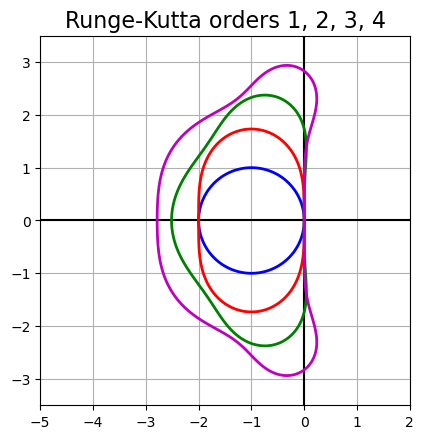

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = [0, 0]
y = [-8, 8]
K = 'k'
plt.plot(y, x, K)
plt.plot(x, y, K)

C = 'color'
c = ['b', 'r', 'g', 'm', 'y', 'c']
x = np.arange(-6, 6, 0.01)
y = np.arange(-6, 6, 0.01)
x, y = np.meshgrid(x, y)


z = x + 1j * y
R1 = 1 + z
R2 = 1 + z + 0.5 * z**2
R3 = 1 + z + 0.5 * z**2 + (1/6) * z**3
R4 = 1 + z + 0.5 * z**2 + (1/6) * z**3 + (1/24) * z**4

plt.contour(x, y, abs(R1), levels=[1], colors=c[0], linewidths=2)
plt.contour(x, y, abs(R2), levels=[1], colors=c[1], linewidths=2)
plt.contour(x, y, abs(R3), levels=[1], colors=c[2], linewidths=2)
plt.contour(x, y, abs(R4), levels=[1], colors=c[3], linewidths=2)

plt.axis('square')
plt.grid(True)
plt.title('Runge-Kutta orders 1, 2, 3, 4', fontsize=16)
plt.axis([-5, 2, -3.5, 3.5])

plt.show()


--- 

# Exercises

--- 

### **Exercise 1.**

Consider the initial value problem (IVP) 
$$u'=\frac{u^2+u}{t},\quad 1\leq t\leq 5,\quad u(1)=-2,$$
whose exact solution is $u(t)=\frac{2t}{1-2t}$.

**Part A: Implementation**

Write a program (using a language like Python, MATLAB, or C++) to solve this IVP using the numerical methods listed below. Note that for the **Backward Euler method**, you will need to solve a quadratic equation for $U^{n+1}$ at each time step.

1.  **Forward Euler method (FE):**
    $$U^{n+1}=U^{n} + k f(U^n,t_n).$$
2.  **Backward Euler method (BE):**
    $$U^{n+1}=U^{n} + k f(U^{n+1},t_{n+1}).$$
    *(Hint: This is an implicit method; rearrange it into a quadratic equation $AU^2 + BU + C = 0$ for $U^{n+1}$ and use the quadratic formula.)*
3.  **Explicit midpoint RK2:**
    \begin{align*} k_1 &= f(U^n, t_n) \\ k_2 &= f\left(U^n + \frac{k}{2} k_1, t_n + \frac{k}{2}\right) \\ U^{n+1} &= U^n + k k_2 \end{align*}
4.  **Explicit trapezoidal RK2 (Improved Euler):**
    \begin{align*} k_1 &= f(U^n, t_n) \\ k_2 &= f(U^n + k k_1, t_n + k) \\ U^{n+1} &= U^n + \frac{k}{2} (k_1 + k_2) \end{align*}
5.  **Heun's method (RK3):**
    \begin{align*} k_1 &= f(U^n, t_n) \\ k_2 &= f\left(U^n + \frac{k}{3} k_1, t_n + \frac{k}{3}\right) \\ k_3 &= f\left(U^n + \frac{2k}{3} k_2, t_n + \frac{2k}{3}\right) \\ U^{n+1} &= U^n + \frac{k}{4} (k_1 + 3k_3) \end{align*}
6.  **Standard RK4:**
    \begin{align*} k_1 &= f(U^n, t_n) \\ k_2 &= f\left(U^n + \frac{k}{2} k_1, t_n + \frac{k}{2}\right) \\ k_3 &= f\left(U^n + \frac{k}{2} k_2, t_n + \frac{k}{2}\right) \\ k_4 &= f(U^n + k k_3, t_n + k) \\ U^{n+1} &= U^n + \frac{k}{6} (k_1 + 2k_2 + 2k_3 + k_4) \end{align*}


**Part B: Convergence Analysis**

Analyze the **convergence** of each method. Compare the numerical solution against the exact solution $u(t)$ at the final time $t=5$ for a sequence of step sizes:
$$k_m = \frac{0.2}{2^m}, \quad \text{for } m=0,1,\dots,6.$$

The exact value at $t=5$ is $u(5) = \frac{2(5)}{1-2(5)} = -\frac{10}{9}$.

**Required Deliverables:**

1.  **Tabular Results:** For each method, present the results in a clear table format, showing $k_m$, the absolute error $\mathcal{E}(k_m) = |U^N(k_m) - u(5)|$, and the **estimated order of convergence** $p$ for consecutive steps.
2.  **Log-Log Plot:** Generate a single log-log plot showing the absolute error $\mathcal{E}$ versus the step size $k$ for **all six methods**.

--- 


**Exercise 2.**

1. Show that the explicit trapezoidal method for $u' = f(u)$ is second-order accurate.

2. Show that the explicit midpoint method for $u' = f(u)$ is second-order accurate.

**Hint:** Compare derivatives of $u$ with their expressions in terms of $f$ and show that terms up to $\mathcal{O}(k^2)$ cancel. Use $u' = f$ and $u'' = \frac{\partial f}{\partial u} u' = f_u f$.

---

**Exercise 3.** Show that when Heun's method

$$
U^{n+1} = U^n + \frac{k}{2} \Big[f(U^n, t_n) + f(U^n + k f(U^n, t_n), t_n + k) \Big]
$$

is applied to $u' = f(t)$ over $[a, b]$ with $u(a) = U^0 = 0$, the result is

$$
u(b) = \frac{k}{2} \sum_{j=0}^{N-1} \big(f(t_j) + f(t_{j+1})\big),
$$

which is the trapezoidal rule approximation for the integral of $f(t)$ over $[a, b]$.

---

**Exercise 4.** Show that when RK4 is applied to $u' = f(t)$ over $[a,b]$ with $u(a) = 0$, the result is

$$
u(b) \approx \frac{k}{6} \sum_{n=0}^{N-1} \big(f(t_n) + 4 f(t_{n+1/2}) + f(t_{n+1}) \big),
$$

where $k = (b-a)/N$, $t_n = a + nk$, and $t_{n+1/2} = a + (n+1/2) k$, which is Simpson's approximation (with step size $k/2$) for the integral of $f(t)$ over $[a,b]$.

---

**Exercise 5.** Consider $u' = \lambda u$, solution $u(t) = u_0 e^{\lambda t}$.

1. Calculate $U^1$ for RK4 in terms of $U^0$ for this differential equation.

2. Calculate the local truncation error by setting $U^0 = u(t_0) = 1$ and evaluating $u(t_1) - U^1$. Show that the error is $O(k^4)$.

---

**Exercise 6.** Construct a third-order Taylor method for

$$
u'(t) = -u(t) + 2 \cos(t), \quad u(0) = 1, \quad 0 < t < 10,
$$

whose exact solution is $u(t) = \sin(t) + \cos(t)$. Check the error decrease ratio when halving $k$.

---

**Exercise 7.** The Taylor method is tedious due to higher-order derivatives. Runge-Kutta methods achieve similar accuracy by evaluating $f$ at multiple points:

$$
Y^{n+1} = Y^n + k F(x_n, Y^n; k), \quad n \ge 0, \quad Y^0 = y_0.
$$

For RK2:

$$
F(x, y; k) = \gamma_1 f(x, y) + \gamma_2 f(x + \alpha k, y + \beta k f(x,y)).
$$

The constants $\{\alpha, \beta, \gamma_1, \gamma_2\}$ are chosen so that the local truncation error

$$
\tau^{n+1} = \frac{1}{k} \big[y(x_{n+1}) - y(x_n) \big] - F(x_n, y(x_n); k)
$$

is $\mathcal{O}(k^2)$, matching a second-order Taylor method.

1. Determine the relationships between $\{\alpha, \beta, \gamma_1, \gamma_2\}$ for second-order accuracy.

2. For $\gamma_2 = 1/2, 3/4, 1$, write down the corresponding coefficients.

3. For $\gamma_2 = 1/2$ and $1$, interpret each method graphically.

---

**Exercise 8.** Write the explicit midpoint RK2, explicit trapezoidal RK2, Heun's third-order method, and classical RK4 in tableau notation.

---

**Exercise 9.** Implement the three-stage RK method from the tableau:

$$
\begin{array}{c|ccc}
0 & 0 & 0 & 0\\
1/2 & 1/2 & 0 & 0\\
1 & 0 & 1 & 0\\
\hline
& 1/6 & 2/3 & 1/6
\end{array}
$$

and analyze its order of convergence on the IVP from Exercise 1.

---

**Exercise 10.** Consider the three-stage RK formula:

$$
\begin{aligned}
V_1 &= f(x_n, y_n) \\
V_2 &= f(x_n + \alpha_2 k, y_n + k \beta_{21} V_1) \\
V_3 &= f(x_n + \alpha_3 k, y_n + k(\beta_{31} V_1 + \beta_{32} V_2)) \\
y_{n+1} &= y_n + k (\gamma_1 V_1 + \gamma_2 V_2 + \gamma_3 V_3)
\end{aligned}
$$

1. Determine the equations the coefficients $\{\gamma_j, \alpha_j, \beta_{ji}\}$ must satisfy for order 3.

2. Find a particular solution.

3. Numerically determine the convergence order on the IVP from Exercise 1.

---

**Exercise 11.** Show that the method

$$
\begin{aligned}
U^0 &= \alpha, \\
U^{n+1} &= U^n + a_1 k f(U^n, t_n) + a_2 k f(U^n + \delta_2 f(U^n, t_n), t_n + \alpha_2 k)
\end{aligned}
$$

cannot have local truncation error $O(k^3)$ for any choice of constants $a_1, a_2, \alpha_2, \delta_2$.

---

**Exercise 12.** Obtain the region of absolute stability for the midpoint method:

$$
y_{n+1} = y_n + k f\Big(\frac{x_n + x_{n+1}}{2}, \frac{y_n + y_{n+1}}{2}\Big).
$$

---

**Exercise 13.**

1. Obtain the region of absolute stability for the backward Euler method.

2. Consider the one-point iteration:

$$
y_{n+1} = y_n + k f(x_{n+1}, y_n + k f(x_n, y_n)).
$$

Does this modify the region of absolute stability?

---

**Exercise 14.** Apply backward Euler to

$$
Y'(x) = \lambda Y(x) + g(x), \quad \lambda < 0 \text{ and large}.
$$

Investigate how small $k$ must be to ensure convergence of

$$
y^{(j+1)}_{n+1} = y_n + k f(x_{n+1}, y^{(j)}_{n+1}), \quad j = 0,1,2,\dots
$$

Is this practical for large $|\lambda|$?

---

**Exercise 15.** Let $\theta \in [0,1]$ and $x_{n+\theta} = (1-\theta)x_n + \theta x_{n+1}$. Consider the generalized midpoint method:

$$
y_{n+1} = y_n + k f(x_{n+\theta}, (1-\theta) y_n + \theta y_{n+1}),
$$

and the trapezoidal analogue:

$$
y_{n+1} = y_n + k[(1-\theta) f(x_n, y_n) + \theta f(x_{n+1}, y_{n+1})].
$$

Determine the regions of absolute stability for:

1. $\theta \in [1/2, 1]$.

2. $0 \le \theta < 1/2$.

---

**Exercise 16.** *From "Numerical Analysis" by Timothy Sauer:*  

**Lorenz equations.** The Lorenz system models simplified atmospheric convection:

$$
\begin{aligned}
x' &= -s x + s y \\
y' &= -x z + r x - y \\
z' &= x y - b z
\end{aligned}
$$

where:

- $x$ is the circulation velocity,  
- $y$ measures the temperature difference,  
- $z$ measures the deviation from a linear temperature profile.  

The parameters are commonly chosen as:

$$
s = 10, \quad r = 28, \quad b = 8/3.
$$

The Python function defining the system is:

```python
def ydot(t, y):
    """
    Lorenz equations.
    
    Parameters
    ----------
    t : float
        Independent variable (time)
    y : array-like of shape (3,)
        State vector [x, y, z]
    
    Returns
    -------
    dydt : list of floats
        Time derivative [dx/dt, dy/dt, dz/dt]
    """
    s = 10.0
    r = 28.0
    b = 8/3
    
    x, y_val, z = y  # unpack state vector
    
    dxdt = -s*x + s*y_val
    dydt = -x*z + r*x - y_val
    dzdt = x*y_val - b*z
    
    return [dxdt, dydt, dzdt]


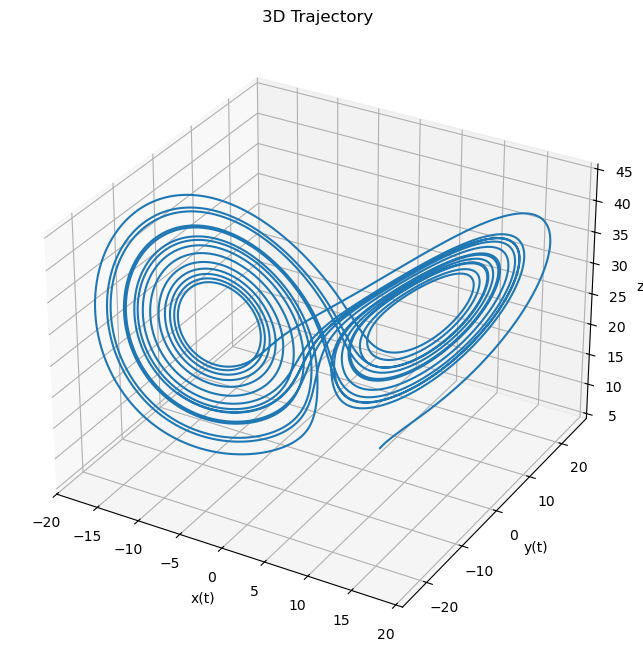

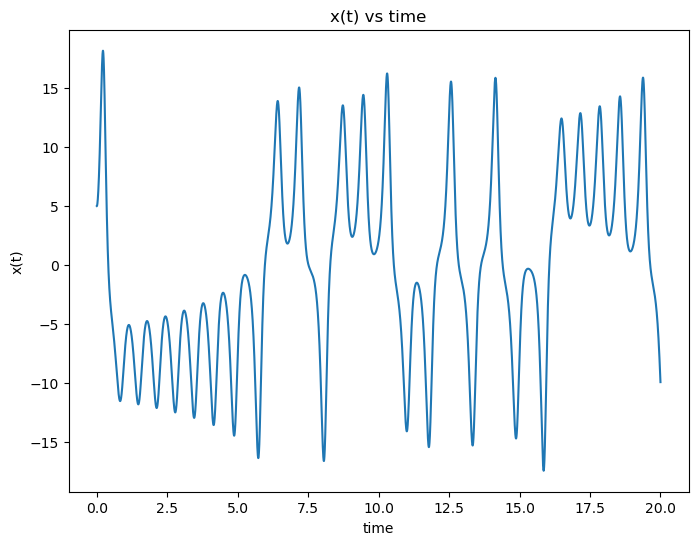

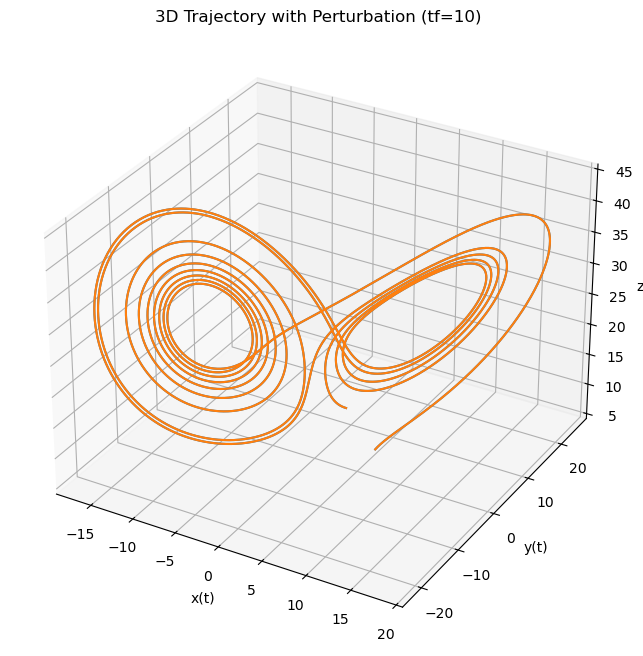

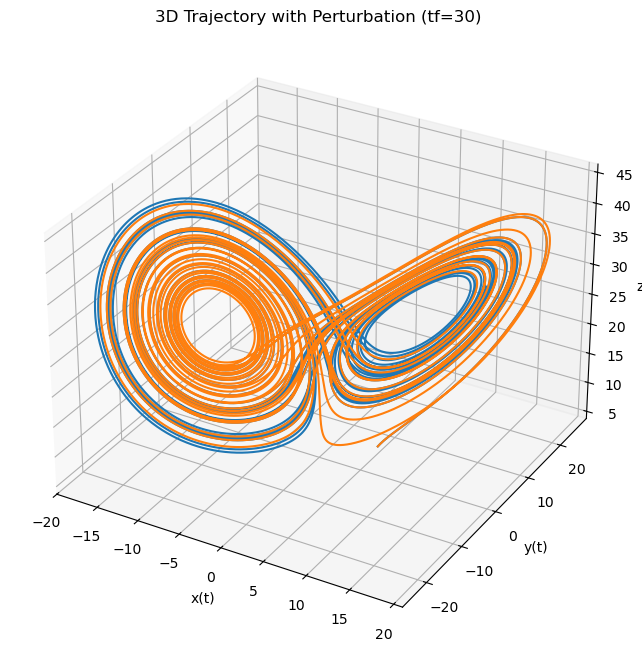

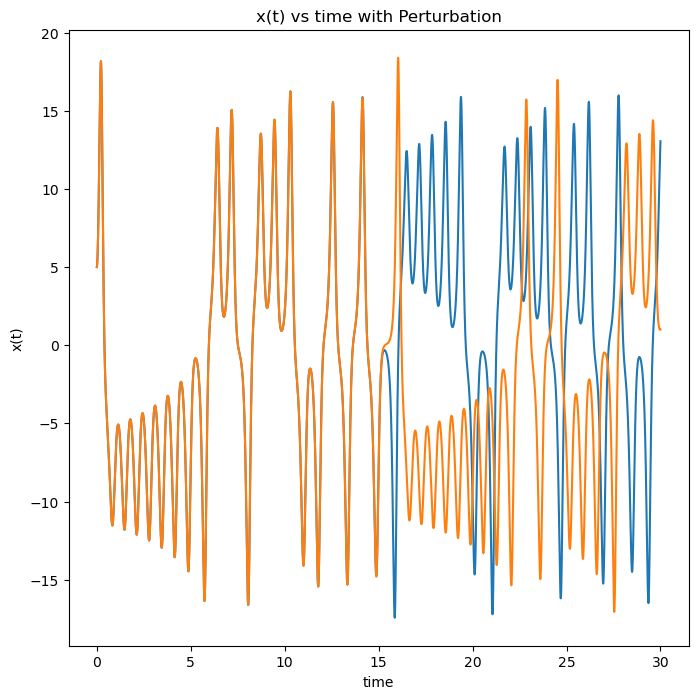

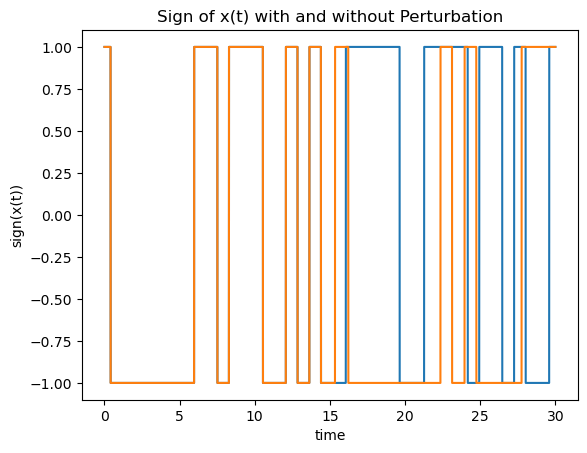

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the Lorenz system
def lorenz(t, y, sigma=10, rho=28, beta=8/3):
    return [-sigma*y[0] + sigma*y[1],
            -y[0]*y[2] + rho*y[0] - y[1],
            y[0]*y[1] - beta*y[2]]

# RK4 method implementation
def rk4(f, tspan, y0, h):
    t = np.arange(tspan[0], tspan[1], h)
    y = np.zeros((len(y0), len(t)))
    y[:, 0] = y0
    for i in range(1, len(t)):
        k1 = np.array(f(t[i-1], y[:, i-1]))
        k2 = np.array(f(t[i-1] + h/2, y[:, i-1] + h/2 * k1))
        k3 = np.array(f(t[i-1] + h/2, y[:, i-1] + h/2 * k2))
        k4 = np.array(f(t[i-1] + h, y[:, i-1] + h * k3))
        y[:, i] = y[:, i-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    return t, y


# Question (a)
tspan = [0, 20]
r0 = [5, 5, 5]
h = 1e-3

# Solve using RK4
t, r = rk4(lorenz, tspan, r0, h)

# 3D trajectory
fig1 = plt.figure(figsize=(8,8))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot(r[0, :], r[1, :], r[2, :])
ax1.set_xlabel('x(t)')
ax1.set_ylabel('y(t)')
ax1.set_zlabel('z(t)')
plt.title('3D Trajectory')
plt.show()


# x position
fig2 = plt.figure(figsize=(8,6))
plt.plot(t, r[0, :])
plt.xlabel('time')
plt.ylabel('x(t)')
plt.title('x(t) vs time')
plt.show()

# Question (b)
p = [1e-5, -2.1e-5, 0]  # perturbation

# tf = 10
tspan = [0, 10]
_, r = rk4(lorenz, tspan, r0, h)
_, rp = rk4(lorenz, tspan, np.array(r0) + np.array(p), h)

# 3D trajectory
fig11 = plt.figure(figsize=(8,8))
ax11 = fig11.add_subplot(111, projection='3d')
ax11.plot(r[0, :], r[1, :], r[2, :])
ax11.plot(rp[0, :], rp[1, :], rp[2, :])
ax11.set_xlabel('x(t)')
ax11.set_ylabel('y(t)')
ax11.set_zlabel('z(t)')
plt.title('3D Trajectory with Perturbation (tf=10)')
plt.show()


# tf = 30
tspan = [0, 30]
t, r = rk4(lorenz, tspan, r0, h)
tp, rp = rk4(lorenz, tspan, np.array(r0) + np.array(p), h)

# 3D trajectory
fig12 = plt.figure(figsize=(8,8))
ax12 = fig12.add_subplot(111, projection='3d')
ax12.plot(r[0, :], r[1, :], r[2, :])
ax12.plot(rp[0, :], rp[1, :], rp[2, :])
ax12.set_xlabel('x(t)')
ax12.set_ylabel('y(t)')
ax12.set_zlabel('z(t)')
plt.title('3D Trajectory with Perturbation (tf=30)')
plt.show()


# x position
fig22 = plt.figure(figsize=(8,8))
plt.plot(t, r[0, :])
plt.plot(tp, rp[0, :])
plt.xlabel('time')
plt.ylabel('x(t)')
plt.title('x(t) vs time with Perturbation')
plt.show()

# Question (c)
x_sign = np.sign(r[0, :])
xp_sign = np.sign(rp[0, :])

fig101 = plt.figure(101)
plt.plot(t, x_sign)
plt.plot(t, xp_sign)
plt.xlabel('time')
plt.ylabel('sign(x(t))')
plt.title('Sign of x(t) with and without Perturbation')

plt.show()